In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
imgs = ['Nadia_Murad.jpg','Denis_Mukwege.jpg','solvay_conference.jpg']

In [13]:
nadia=cv2.imread(imgs[0],0)
denis=cv2.imread(imgs[1],0)
solvay=cv2.imread(imgs[2],0)

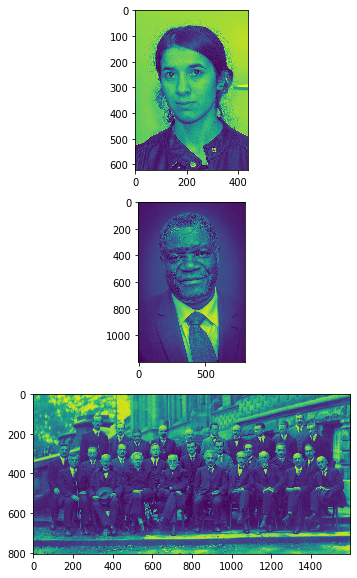

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.imshow(nadia)
plt.subplot(312)
plt.imshow(denis)
plt.subplot(313)
plt.imshow(solvay)

In [26]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [61]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),255,10)
        
    return face_img

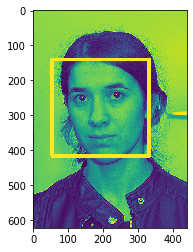

In [28]:
result = detect_face(nadia)
plt.imshow(result)

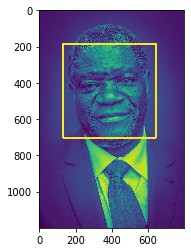

In [29]:
result = detect_face(denis)
plt.imshow(result)

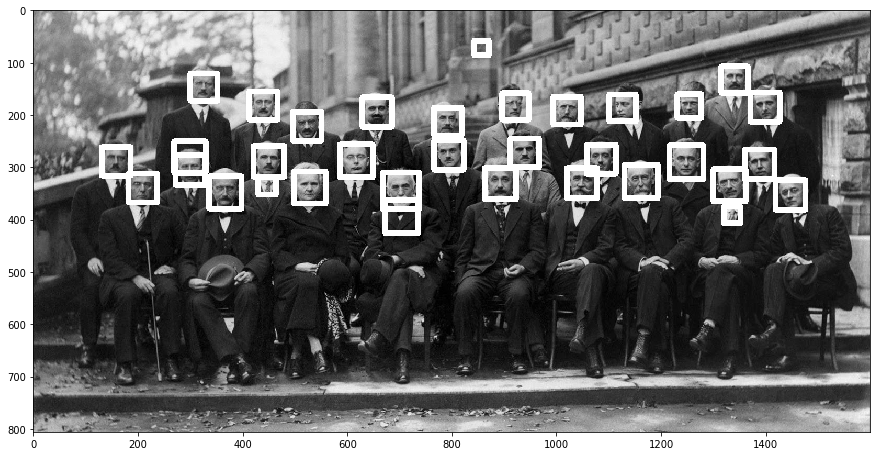

In [38]:
result = detect_face(solvay)
plt.figure(figsize=(15,20))
plt.imshow(result,cmap='gray')

In [60]:
def detect_face_modified(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),255,10)
        
    return face_img

Modified
Old


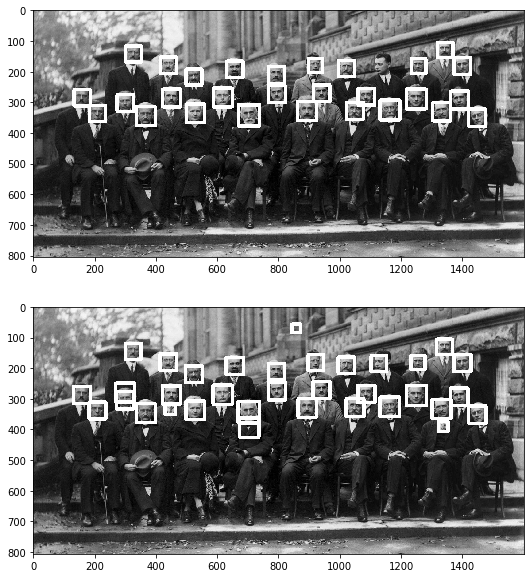

In [45]:
result_new = detect_face_modified(solvay)
plt.figure(figsize=(10,10))
print('Modified')
plt.subplot(211)
plt.imshow(result_new,cmap='gray')
print('Old')
plt.subplot(212)
plt.imshow(result,cmap='gray')

In [49]:
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

def detect_eye(img):
    
    face_img = img.copy()
    
    face_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),255,5)
        
    return face_img

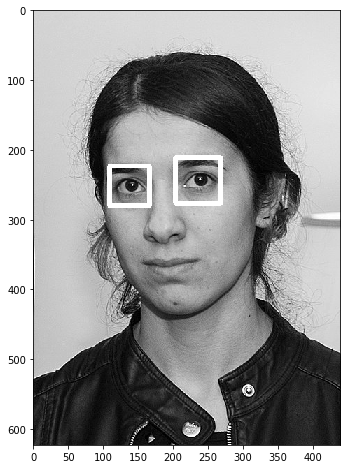

In [51]:
result = detect_eye(nadia)
plt.figure(figsize=(8,8))
plt.imshow(result,cmap='gray')

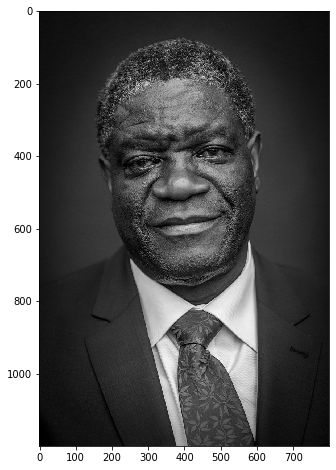

In [52]:
result = detect_eye(denis)
plt.figure(figsize=(8,8))
plt.imshow(result,cmap='gray')

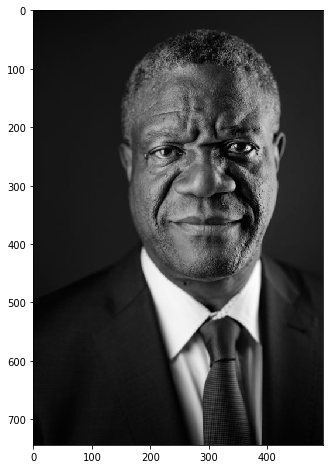

In [54]:
denis_new = cv2.imread('denis_white.jpg',0)
plt.figure(figsize=(8,8))
plt.imshow(denis_new,cmap='gray')

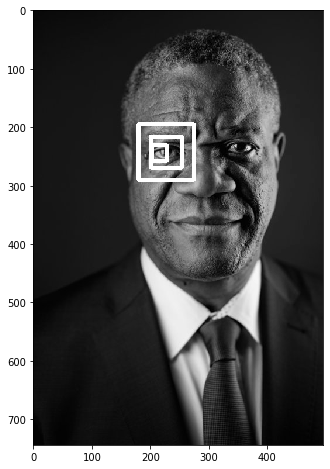

In [55]:
result = detect_eye(denis_new)
plt.figure(figsize=(8,8))
plt.imshow(result,cmap='gray')

In [64]:
cap =cv2.VideoCapture(0)

while True:
    _,frame = cap.read(0)
    
    frame = detect_face_modified(frame)
    frame = detect_eye_modified(frame)
    cv2.imshow('vid', frame)
    
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()        